In [1]:
print('Start import')
import socket 
import strax
import straxen
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import datetime
import pandas as pd
print(
f'''Working on {socket.getfqdn()} with the following versions 
and installation paths:
strax
\tv{strax.__version__}\t{str(strax.__path__[0])}
straxen
\tv{straxen.__version__}\t{str(straxen.__path__[0])}
''')
from multihist import Hist1d, Histdd
import time
import itertools
import os

from scipy import stats
from straxen import units
from scipy.optimize import curve_fit

import peaks_utility as psu
import drift_diffusion_utility as ddu

Start import
Working on midway2-0417.rcc.local with the following versions 
and installation paths:
strax
	v0.13.7	/dali/lgrandi/strax/strax/strax
straxen
	v0.14.5	/dali/lgrandi/strax/straxen/straxen



In [2]:
st = straxen.contexts.xenonnt_online()

In [36]:
dsets = st.select_runs(exclude_tags=('bad','messy'), run_mode='tpc_commissioning*',
                       available=('event_basics','peak_basics'))
dsets = dsets[(dsets.end > pd.to_datetime('01/28/2021'))]
dsets = dsets[(dsets.end < pd.to_datetime('01/29/2021'))]
print('total number of runs:', len(dsets))

total number of runs: 25


In [37]:
dsets

,name,number,mode,start,end,tags,livetime,raw_records_available,peak_basics_available,event_basics_available
190,012275,12275,tpc_commissioning_kr83m,2021-01-28 22:51:30.167,2021-01-28 23:21:32.562,,0 days 00:30:02.395000,False,True,True
192,012273,12273,tpc_commissioning_kr83m,2021-01-28 21:50:53.912,2021-01-28 22:20:56.411,,0 days 00:30:02.499000,False,True,True
193,012272,12272,tpc_commissioning_kr83m,2021-01-28 21:20:37.322,2021-01-28 21:50:39.654,,0 days 00:30:02.332000,False,True,True
194,012271,12271,tpc_commissioning_kr83m,2021-01-28 20:50:19.596,2021-01-28 21:20:20.124,,0 days 00:30:00.528000,False,True,True
195,012270,12270,tpc_commissioning_kr83m,2021-01-28 20:20:02.801,2021-01-28 20:50:05.446,,0 days 00:30:02.645000,False,True,True
200,012265,12265,tpc_commissioning_kr83m,2021-01-28 19:19:26.334,2021-01-28 19:49:28.672,,0 days 00:30:02.338000,False,True,True
210,012255,12255,tpc_commissioning_kr83m,2021-01-28 17:18:19.883,2021-01-28 17:48:22.292,,0 days 00:30:02.409000,False,True,True
211,012254,12254,tpc_commissioning_kr83m,2021-01-28 16:48:03.581,2021-01-28 17:18:05.627,,0 days 00:30:02.046000,False,True,True
212,012253,12253,tpc_commissioning_kr83m,2021-01-28 16:17:45.214,2021-01-28 16:47:46.372,,0 days 00:30:01.158000,False,True,True
214,012251,12251,tpc_commissioning_kr83m,2021-01-28 15:17:10.957,2021-01-28 15:47:13.545,,0 days 00:30:02.588000,False,True,True


Loading event_info: |          | 0.00 % [00:00<?]

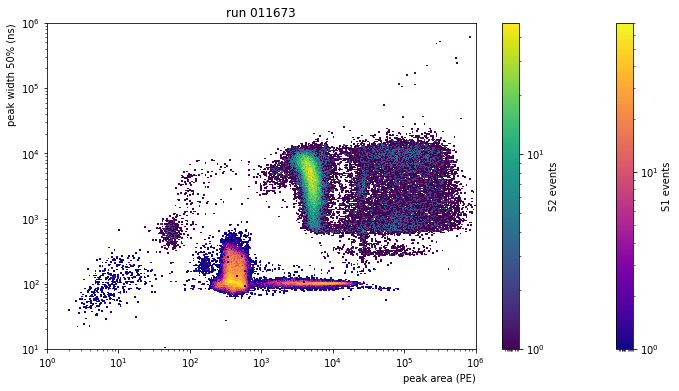

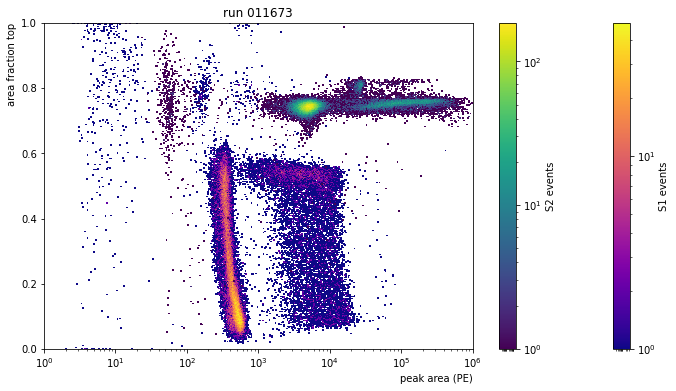

In [3]:
run_kr = '011673' #2021-01-05 15:25 00:15:01 DAQ test - Veto TRG: 6ms veto off, 10m veto on
ddu.plot_area_width_aft(st,run_kr)

Loading event_info: |          | 0.00 % [00:00<?]

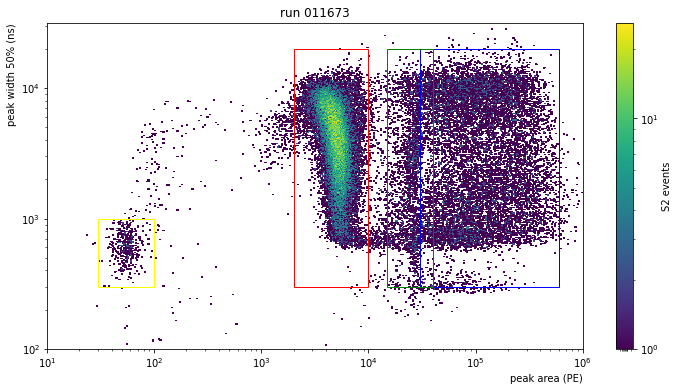

In [4]:
ddu.plots2_area_width(st,run_kr,1,6,2,4.5)
area0 = (30,100)
area1 = (2e3,1e4)
area2 = (3e4,6e5)
area3 = (1.5e4,4e4)
width0 = (300,1000)
width1 = (300,2e4)
width2 = (300,2e4)
width3 = (300,2e4)
psu.rectangle(area0, width0, 'yellow')
psu.rectangle(area1, width1, 'r')
psu.rectangle(area2, width2, 'b')
psu.rectangle(area3, width3, 'g')

Loading event_info: |          | 0.00 % [00:00<?]

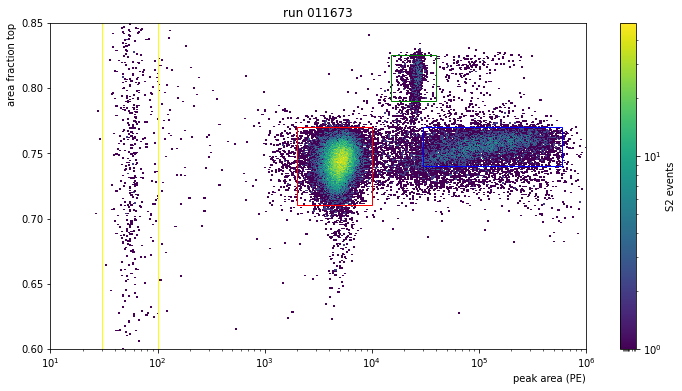

In [5]:
ddu.plots2_area_aft(st,run_kr,1,6,0.6,0.85)
aft1 = (0.71,0.77)
aft2 = (0.74,0.77)
aft3 = (0.79,0.825)
psu.rectangle(area0, (0,1), 'yellow')
psu.rectangle(area1, aft1, 'r')
psu.rectangle(area2, aft2, 'b')
psu.rectangle(area3, aft3, 'g')

Loading event_info: |          | 0.00 % [00:00<?]

/home/valerioda/xenon-notes/fast_response_analysis/drift_diffusion_utility.py:101: RuntimeWarning: divide by zero encountered in true_divide
  area_ratio = np.divide(events['cs2'],events['cs1'])


Drift velocity = 0.603 mm/$\mu$s


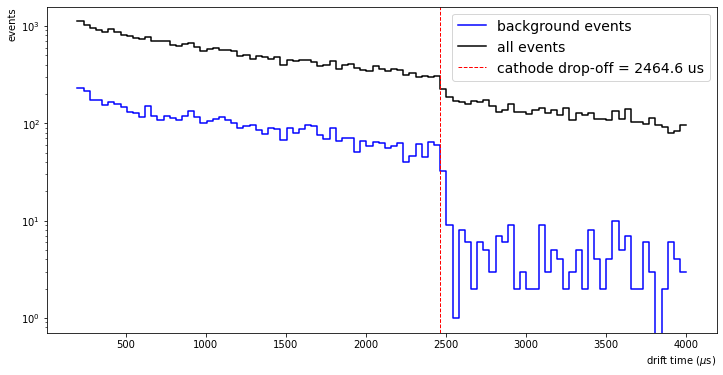

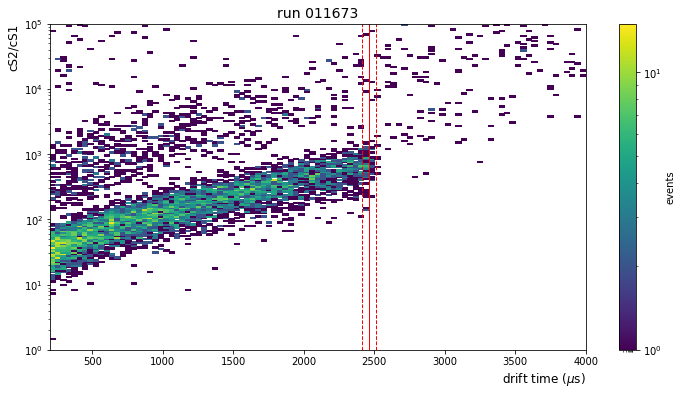

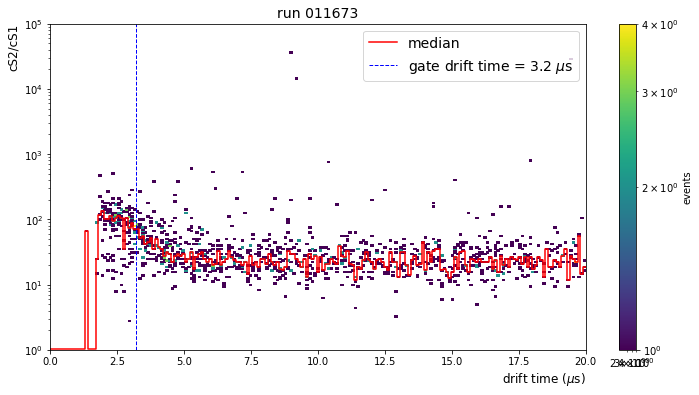

In [9]:
vd_kr = ddu.drift_velocity(st,run_kr,area2, aft2, width2, low = 200, high = 4000, binning = 100, perc=2)

Loading event_info: |          | 0.00 % [00:00<?]

Drift velocity = 0.603 mm/$\mu$s 
Diffusion constant = 32.65 +/- 0.45 cm$^2$/s 
w0 = 682.29 +/- 102.00 ns 


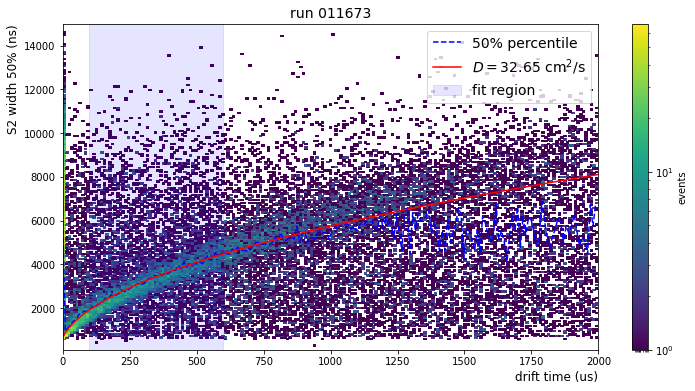

In [8]:
ddu.diffusion_constant(st, run_kr, area1, aft1, width1,fit_range=(100,600),vd = vd_kr)

Loading event_info: |          | 0.00 % [00:00<?]

Drift velocity = 0.603 mm/$\mu$s 
Diffusion constant = 47.62 +/- inf cm$^2$/s 
w0 = -0.02 +/- inf ns 


/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


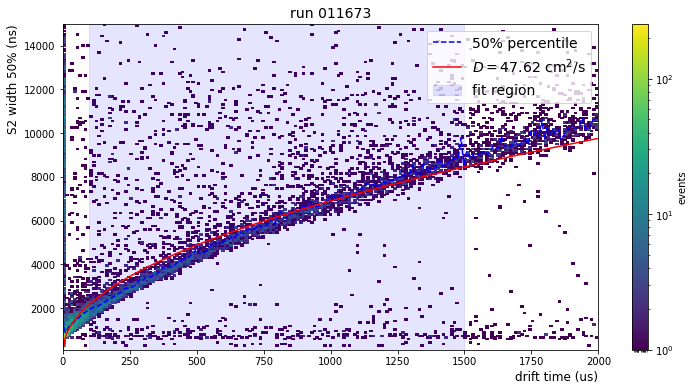

In [9]:
ddu.diffusion_constant(st,run_kr, area2, aft2, width2, fit_range=(100,1500),vd = vd_kr)

|          | 0.00 % [00:00<?], Rate last Chunk: nan s/chunk, #chunks processed: 0

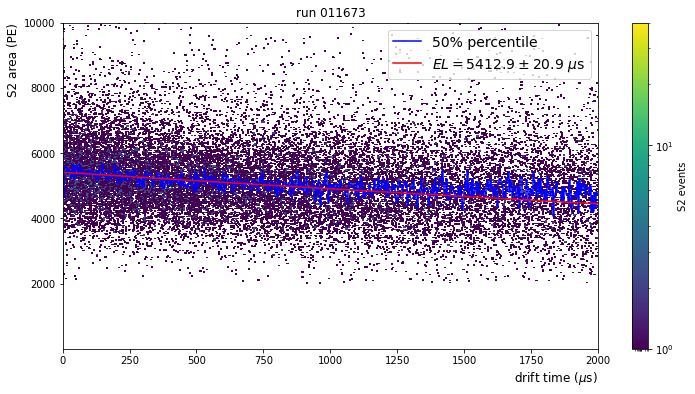

In [9]:
ddu.electron_lifetime(st,run_kr, area1, aft1, width1)

# Background Run

|          | 0.00 % [00:00<?], Rate last Chunk: nan s/chunk, #chunks processed: 0

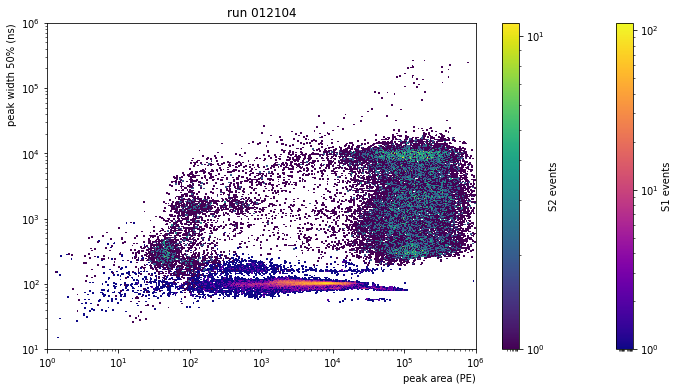

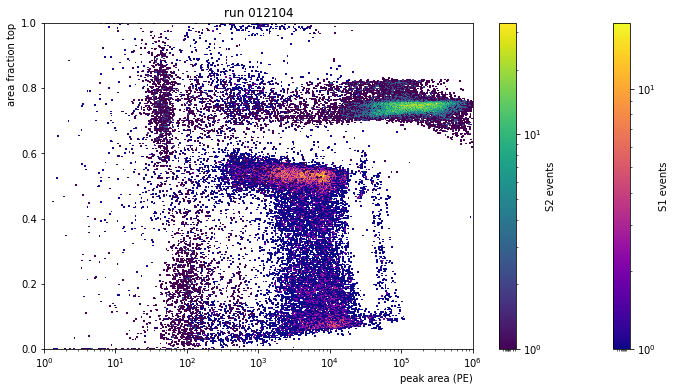

In [10]:
run_bkg = '012104'#	2021-01-26 14:38 01:00:02 BS and cathode at -2.75kV, gate at 0kV, SR at +400V, anode at +4.5kV, TS at -1.3kV, PMTs at a gain of 2e6 with a 1310V cutoff (PMT 260 at 1250V, PMTs 164, 352, 354, 362, 386, 393, 427 are off)
ddu.plot_area_width_aft(st,run_bkg)

|          | 0.00 % [00:00<?], Rate last Chunk: nan s/chunk, #chunks processed: 0

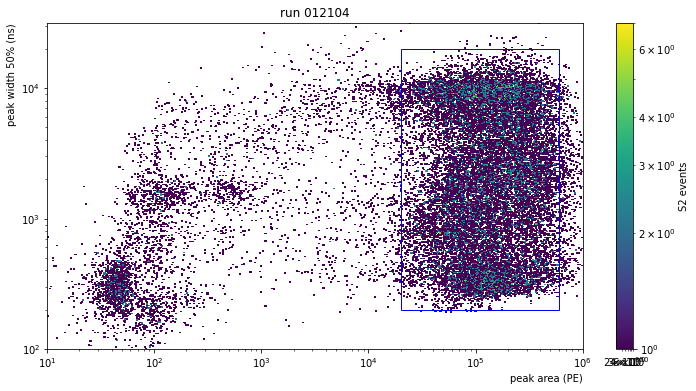

In [11]:
ddu.plots2_area_width(st,run_bkg,1,6,2,4.5)
area2 = (2e4,6e5)
width2 = (200,2e4)
psu.rectangle(area2, width2, 'b')

|          | 0.00 % [00:00<?], Rate last Chunk: nan s/chunk, #chunks processed: 0

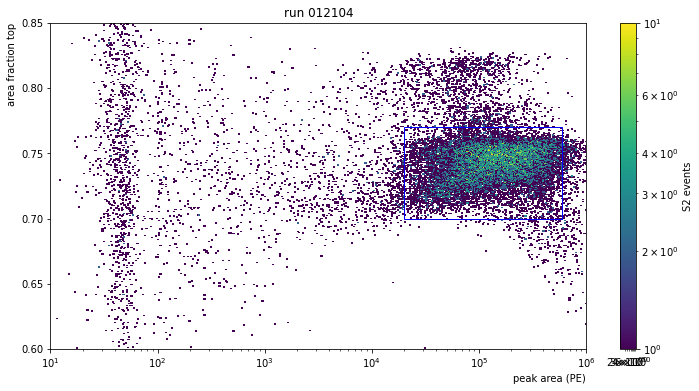

In [12]:
ddu.plots2_area_aft(st,run_bkg,1,6,0.6,0.85)
aft2 = (0.7,0.77)
psu.rectangle(area2, aft2, 'b')

|          | 0.00 % [00:00<?], Rate last Chunk: nan s/chunk, #chunks processed: 0

/home/valerioda/xenon-notes/fast_response_analysis/drift_diffusion_utility.py:101: RuntimeWarning: divide by zero encountered in true_divide
  area_ratio = np.divide(events['cs2'],events['cs1'])


Drift velocity = 0.629 mm/$\mu$s


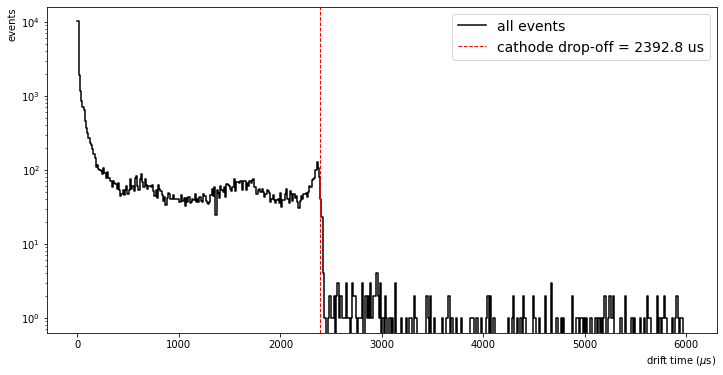

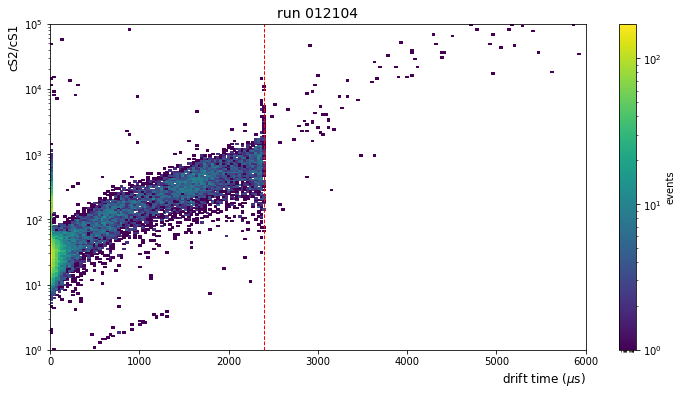

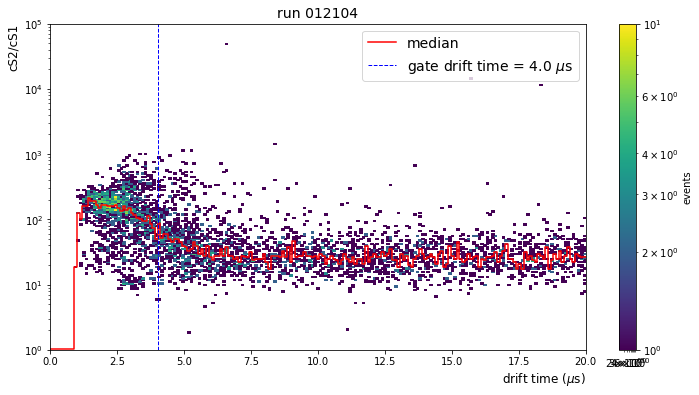

In [13]:
vd_bkg = ddu.drift_velocity(st,run_bkg,area2, aft2, width2, bplot=False)

|          | 0.00 % [00:00<?], Rate last Chunk: nan s/chunk, #chunks processed: 0

Drift velocity = 0.629 mm/$\mu$s 
Diffusion constant = 51.89 +/- 0.43 cm$^2$/s 
w0 = 1099.45 +/- 85.30 ns 


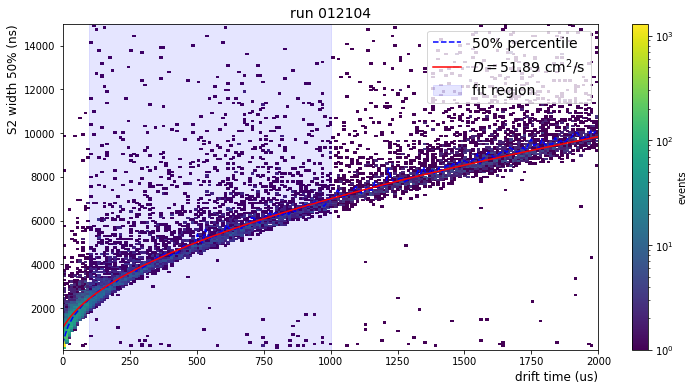

In [14]:
ddu.diffusion_constant(st,run_bkg, area2, aft2, width2,fit_range=(100,1000),vd = vd_bkg)

# New Kr-83m data

Loading event_info: |          | 0.00 % [00:00<?]

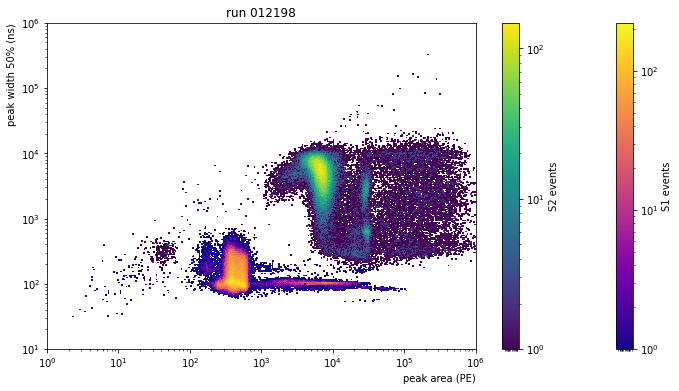

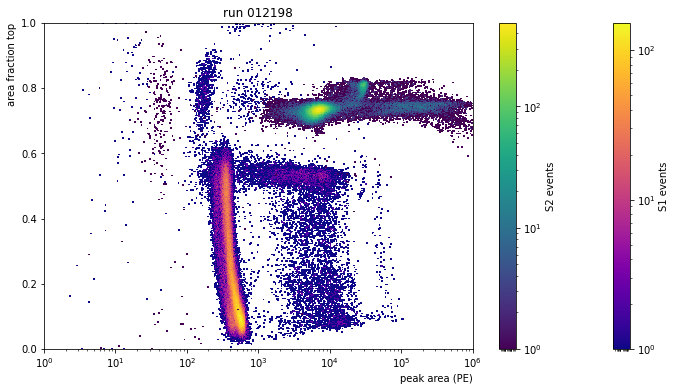

In [13]:
run_kr2 = '012198'
#2021-01-27 18:10 00:30:02 Needle valve mode (1 turns open). BS and cathode at -2.75kV, gate at 0kV, SR at +400V, anode at +4.5kV, TS at -1.3kV, Kr valve open, LXe, PMTs at a gain of 2e6 with a 1310V cutoff (PMT 260 at 1250V, PMTs 164, 352, 354, 362, 386, 393, 427 are off)
ddu.plot_area_width_aft(st,run_kr2)

Loading event_info: |          | 0.00 % [00:00<?]

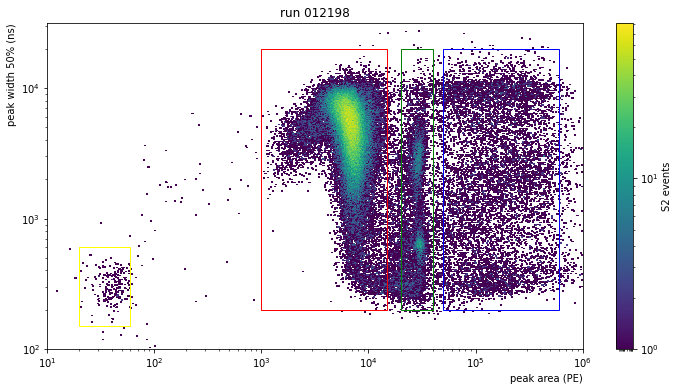

In [14]:
ddu.plots2_area_width(st,run_kr2,1,6,2,4.5)
area0 = (20,60)
area1 = (1e3,1.5e4)
area2 = (5e4,6e5)
area3 = (2e4,4e4)
width0 = (150,600)
width1 = (200,2e4)
width2 = (200,2e4)
width3 = (200,2e4)
psu.rectangle(area0, width0, 'yellow')
psu.rectangle(area1, width1, 'r')
psu.rectangle(area2, width2, 'b')
psu.rectangle(area3, width3, 'g')

Loading event_info: |          | 0.00 % [00:00<?]

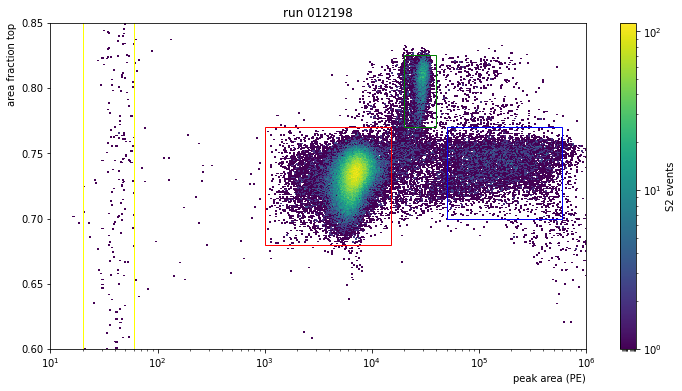

In [15]:
ddu.plots2_area_aft(st,run_kr2,1,6,0.6,0.85)
aft1 = (0.68,0.77)
aft2 = (0.7,0.77)
aft3 = (0.77,0.825)
psu.rectangle(area0, (0,1), 'yellow')
psu.rectangle(area1, aft1, 'r')
psu.rectangle(area2, aft2, 'b')
psu.rectangle(area3, aft3, 'g')

Loading event_info: |          | 0.00 % [00:00<?]

/home/valerioda/xenon-notes/fast_response_analysis/drift_diffusion_utility.py:101: RuntimeWarning: divide by zero encountered in true_divide
  area_ratio = np.divide(events['cs2'],events['cs1'])


Drift velocity = 0.632 mm/$\mu$s


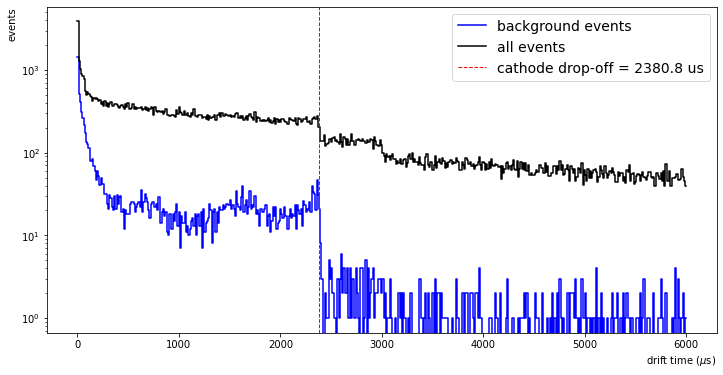

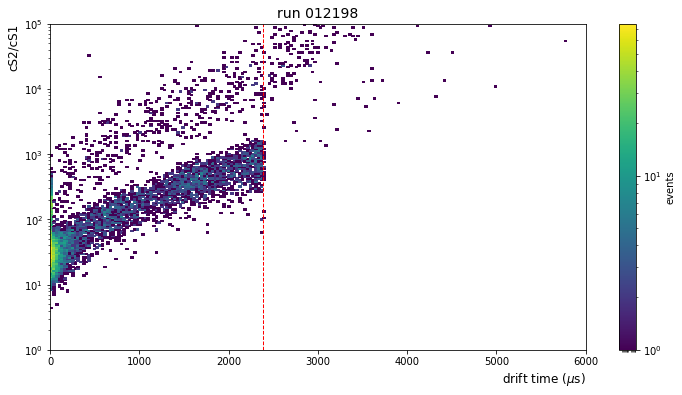

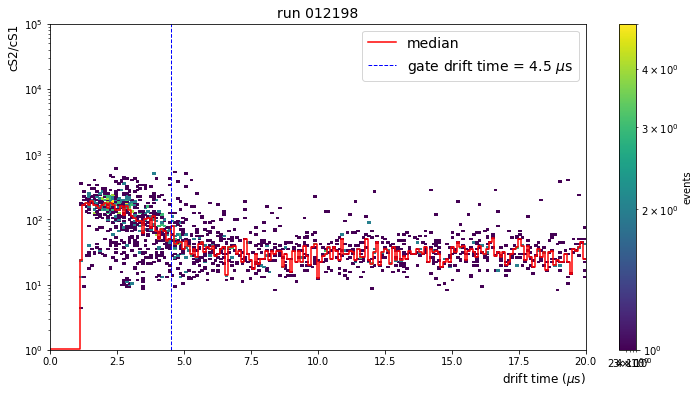

In [16]:
vd_kr2 = ddu.drift_velocity(st, run_kr2,area2, aft2, width2)

Loading event_info: |          | 0.00 % [00:00<?]

Drift velocity = 0.632 mm/$\mu$s 
Diffusion constant = 42.89 +/- 0.38 cm$^2$/s 
w0 = 1251.38 +/- 43.39 ns 


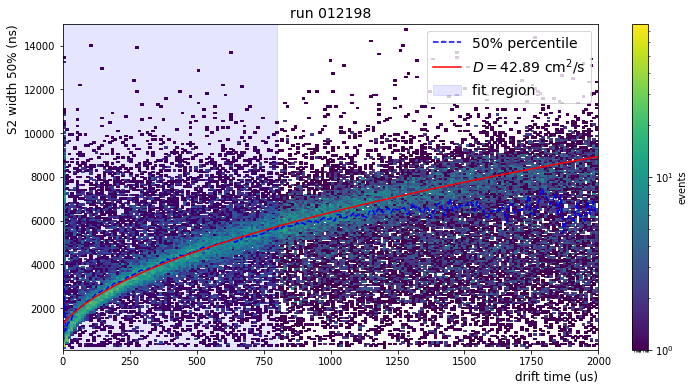

In [18]:
ddu.diffusion_constant(st,run_kr2, area1, aft1, width1,fit_range=(1,800),vd = vd_kr2)

Loading event_info: |          | 0.00 % [00:00<?]

Drift velocity = 0.632 mm/$\mu$s 
Diffusion constant = 51.88 +/- 0.47 cm$^2$/s 
w0 = 991.30 +/- 82.57 ns 


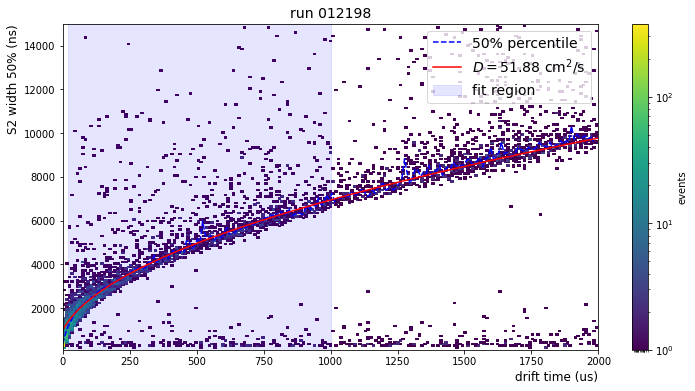

In [19]:
ddu.diffusion_constant(st,run_kr2, area2, aft2, width2,fit_range=(20,1000),vd = vd_kr2)

# New Kr-83m data with liquid level of ~5.5 mm

Loading event_info: |          | 0.00 % [00:00<?]

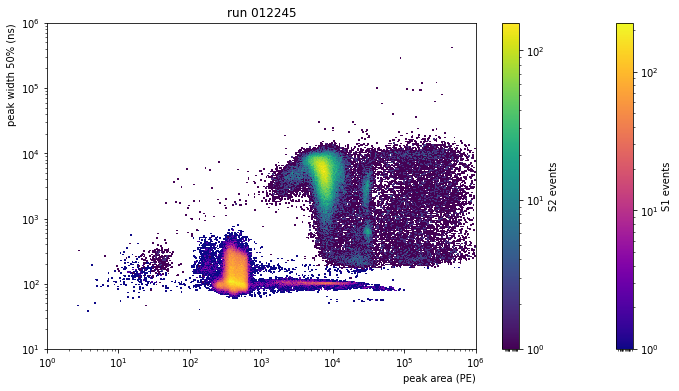

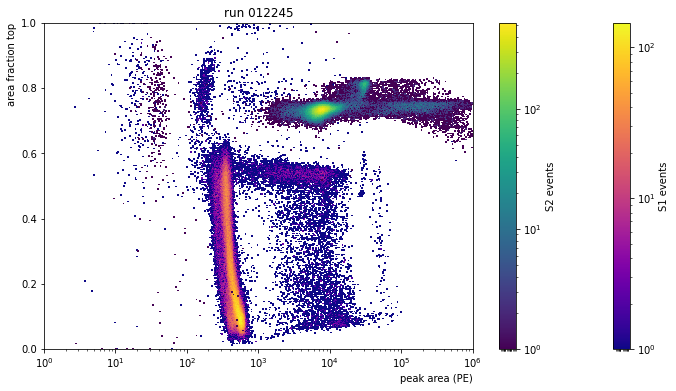

In [3]:
run_kr3 = '012245'
#2021-01-28 14:00 new data with a liquid level of ~5.5 mm
ddu.plot_area_width_aft(st,run_kr3)

Loading event_info: |          | 0.00 % [00:00<?]

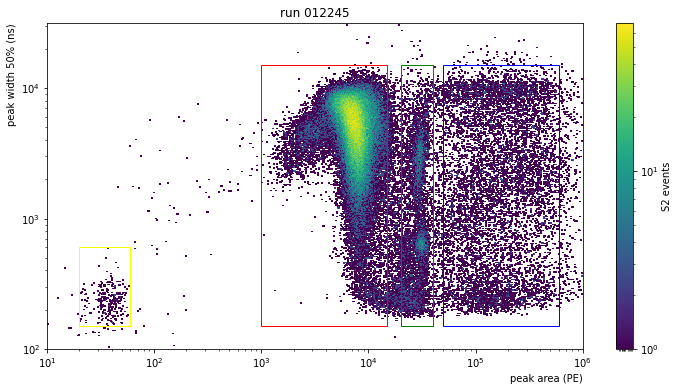

In [4]:
ddu.plots2_area_width(st,run_kr3,1,6,2,4.5)
area0 = (20,60)
area1 = (1e3,1.5e4)
area2 = (5e4,6e5)
area3 = (2e4,4e4)
width0 = (150,600)
width1 = (150,1.5e4)
width2 = (150,1.5e4)
width3 = (150,1.5e4)
psu.rectangle(area0, width0, 'yellow')
psu.rectangle(area1, width1, 'r')
psu.rectangle(area2, width2, 'b')
psu.rectangle(area3, width3, 'g')

Loading event_info: |          | 0.00 % [00:00<?]

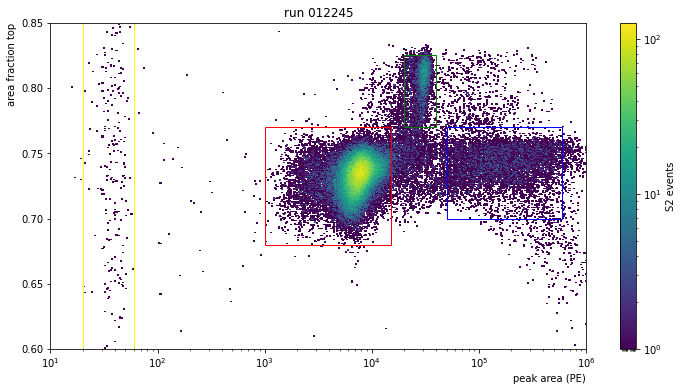

In [5]:
ddu.plots2_area_aft(st,run_kr3,1,6,0.6,0.85)
aft1 = (0.68,0.77)
aft2 = (0.7,0.77)
aft3 = (0.77,0.825)
psu.rectangle(area0, (0,1), 'yellow')
psu.rectangle(area1, aft1, 'r')
psu.rectangle(area2, aft2, 'b')
psu.rectangle(area3, aft3, 'g')

Loading event_info: |          | 0.00 % [00:00<?]

/home/valerioda/xenon-notes/fast_response_analysis/drift_diffusion_utility.py:101: RuntimeWarning: divide by zero encountered in true_divide
  area_ratio = np.divide(events['cs2'],events['cs1'])


Drift velocity = 0.632 mm/$\mu$s


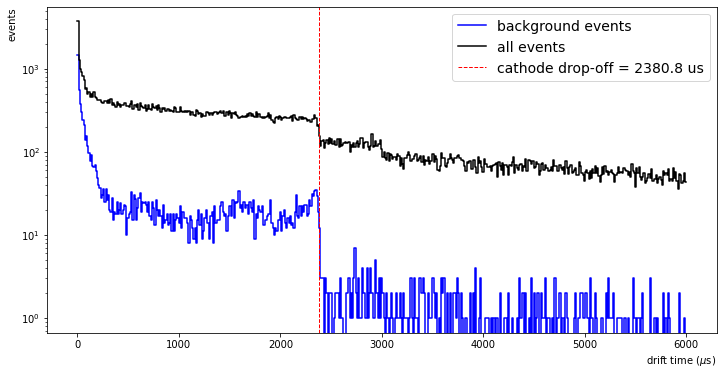

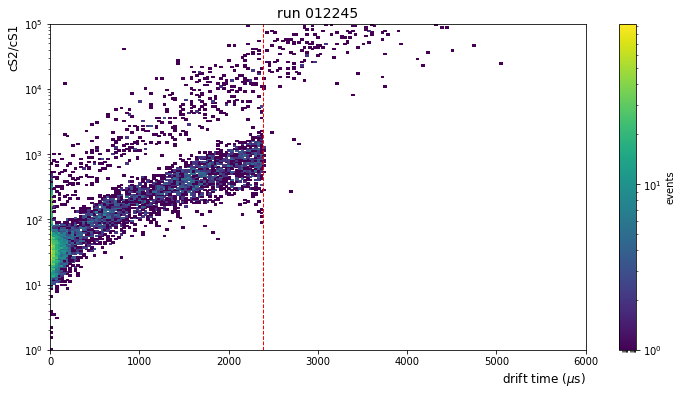

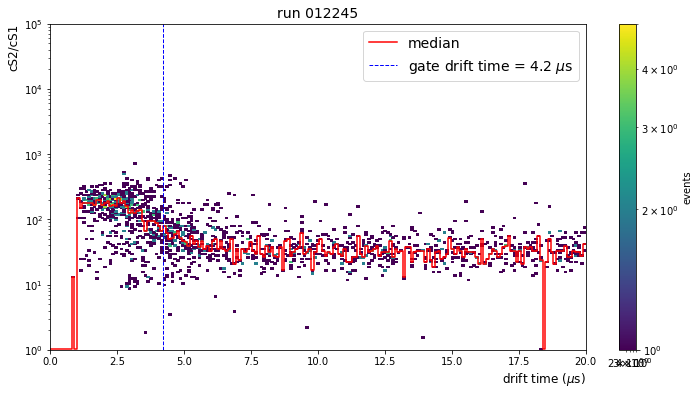

In [7]:
vd_kr3 = ddu.drift_velocity(st, run_kr3,area2, aft2, width2)

Loading event_info: |          | 0.00 % [00:00<?]

Drift velocity = 0.632 mm/$\mu$s 
Diffusion constant = 42.50 +/- 0.32 cm$^2$/s 
w0 = 1122.61 +/- 40.05 ns 


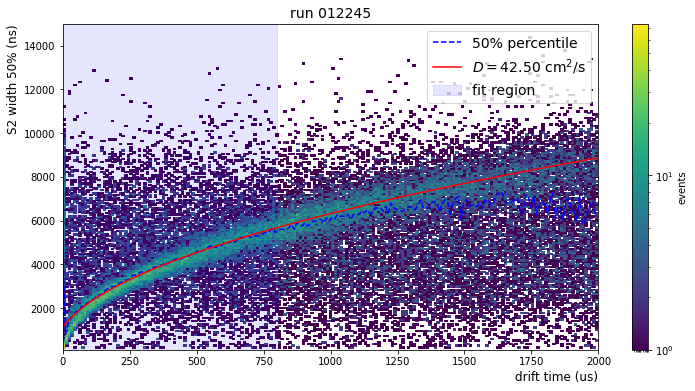

In [12]:
ddu.diffusion_constant(st,run_kr3, area1, aft1, width1,fit_range=(1,800),vd = vd_kr3)

Loading event_info: |          | 0.00 % [00:00<?]

Drift velocity = 0.632 mm/$\mu$s 
Diffusion constant = 50.56 +/- 0.44 cm$^2$/s 
w0 = 747.55 +/- 101.16 ns 


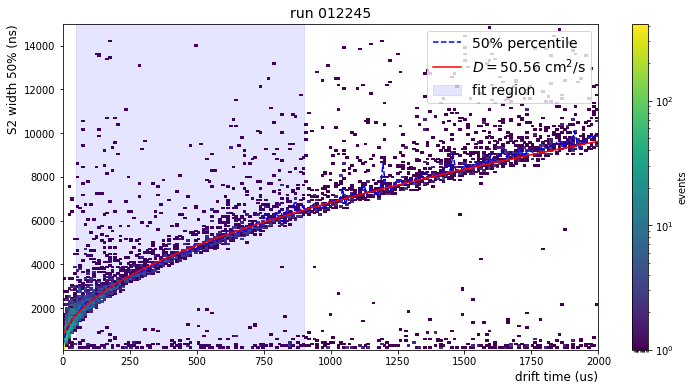

In [9]:
ddu.diffusion_constant(st,run_kr3, area2, aft2, width2,fit_range=(50,900),vd = vd_kr3)

# Drift and Diffusion Comparison - X1T vs XnT

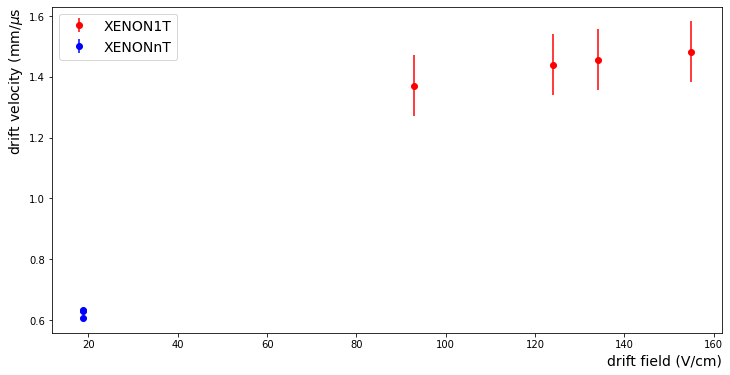

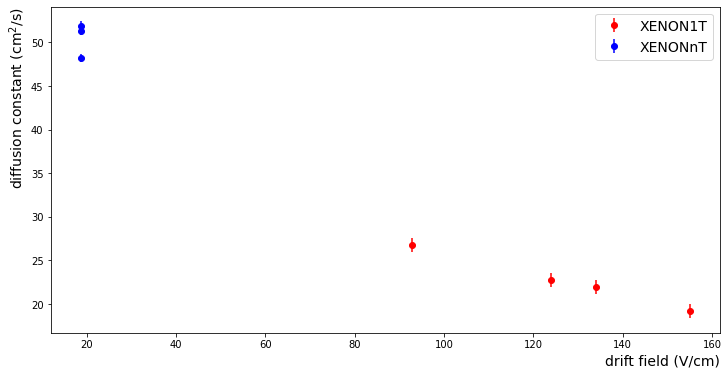

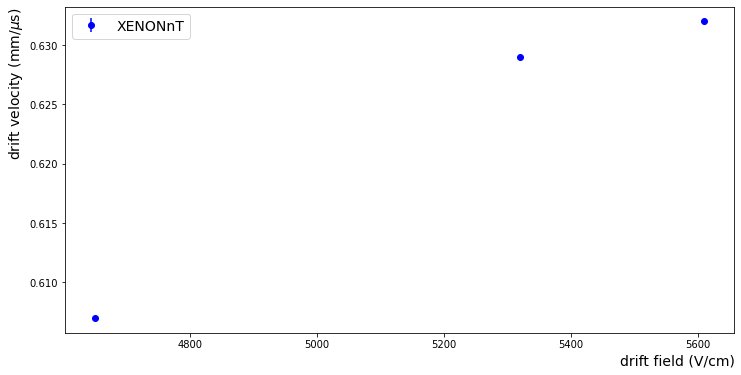

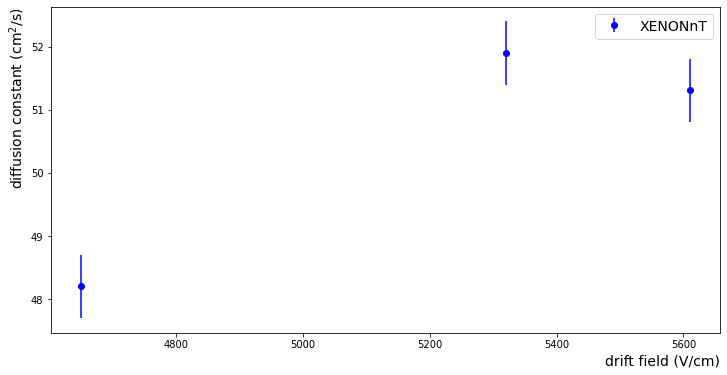

In [41]:
field1T = [155,134,124,92.8]
drift_vel_1T = [1.482,1.456,1.440,1.371]
diff_1T = [19.2, 21.9, 22.8, 26.8]
el_1T = [654,666,673,708]

fieldnT = [18.7,18.7,18.7]
drift_vel_nT = [0.607,0.629,0.632]
el_nT = [4650,5320,5610]
#diff_nT = [33.1,48.2,51.9,40.2,51.31]
diff_nT = [48.2, 51.9, 51.31]
plt.figure(figsize=(12,6))
plt.errorbar(field1T,drift_vel_1T,yerr=0.1,fmt='o',color='r',label='XENON1T')
plt.errorbar(fieldnT,drift_vel_nT,yerr=0.,fmt='o',color='b',label='XENONnT')
plt.xlabel("drift field (V/cm)", ha='right', x=1,fontsize=14)
plt.ylabel("drift velocity (mm/$\mu$s", ha='right', y=1,fontsize=14)

plt.legend(fontsize=14)
plt.figure(figsize=(12,6))
plt.errorbar(field1T,diff_1T,yerr=0.8,fmt='o',color='r',label='XENON1T')
plt.errorbar(fieldnT,diff_nT,yerr=0.5,fmt='o',color='b',label='XENONnT')
plt.xlabel("drift field (V/cm)", ha='right', x=1,fontsize=14)
plt.ylabel("diffusion constant (cm$^2$/s)", ha='right', y=1,fontsize=14)
plt.legend(fontsize=14)

plt.figure(figsize=(12,6))
#plt.errorbar(el_1T,drift_vel_1T,yerr=0.1,fmt='o',color='r',label='XENON1T')
plt.errorbar(el_nT,drift_vel_nT,yerr=0.,fmt='o',color='b',label='XENONnT')
plt.xlabel("drift field (V/cm)", ha='right', x=1,fontsize=14)
plt.ylabel("drift velocity (mm/$\mu$s)", ha='right', y=1,fontsize=14)

plt.legend(fontsize=14)
plt.figure(figsize=(12,6))
#plt.errorbar(el_1T,diff_1T,yerr=0.8,fmt='o',color='r',label='XENON1T')
plt.errorbar(el_nT,diff_nT,yerr=0.5,fmt='o',color='b',label='XENONnT')
plt.xlabel("drift field (V/cm)", ha='right', x=1,fontsize=14)
plt.ylabel("diffusion constant (cm$^2$/s)", ha='right', y=1,fontsize=14)
plt.legend(fontsize=14)

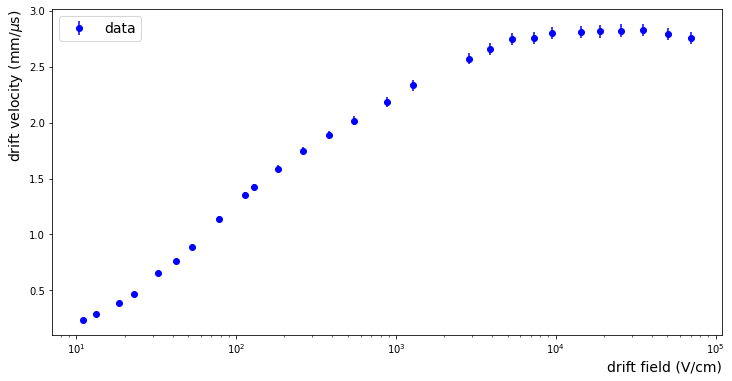

In [28]:
def pol5(x, a, b, c, d, e, f):
    return a*x**5 + b*x**4 + c*x**3 + d*x**2 + e * x + f

with open("DriftVelocity.txt") as f:
    data = f.read()
data = data.split('\n')
ind = [row.split('\t')[0] for row in data]
dt = [row.split('\t')[1] for row in data]
dv = [row.split('\t')[2] for row in data]
dt = np.array(dt, dtype=np.float32)
dv = np.array(dv, dtype=np.float32)
plt.figure(figsize=(12,6))
plt.errorbar(dt,dv,yerr=dv*0.02, c='b', fmt='o', label='data')   
plt.xlabel('drift field (V/cm)',ha='right',x=1,fontsize=14)
plt.ylabel('drift velocity (mm/$\mu$s)',ha='right',y=1,fontsize=14)
plt.xscale('log')
popt, pcov = curve_fit(pol5, dt, dv)
#plt.plot(dt, pol5(dt, *popt), 'r--', label='fit')
plt.legend(fontsize=14)